In [21]:
from preparing_script import agrofiz_plot, SVD_vis
import pandas as pd 
import numpy as np 
import scipy 

import seaborn as sns 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
agrofiz = pd.read_csv("полевые данные общая/ready_data/агрофизика.csv")


In [5]:
agrofiz.columns

Index(['Год', 'GPS №', 'Тип обработки', 'повторность',
       'Содержание 0,25–10 мм, %', 'Содержание >10, %', 'Содержание <0.25, %',
       'Коэф. структурности', 'СВД, мм', 'Коэф. АФИ',
       'Содержание 0.25–10 мм(водоустойчивые), % ',
       'СВД водоустойчивые 10-7, мм', 'СВД водоустойчивые 5-3, мм',
       'СВД водоустойчивые 7-5, мм', 'СВД водоустойчивые >10, мм'],
      dtype='object')

In [23]:
samp = agrofiz[["Тип обработки",'Коэф. структурности' ]]

In [25]:
stats_type = samp.groupby(["Тип обработки"]).agg({ np.mean,  np.std, scipy.stats.variation})
stats_type

Коэф. структурности                    
                              std variation      mean
Тип обработки                                        
ПП                       0.157294  0.219382  0.675982
ТТ                       0.269618  0.287556  0.855924

In [29]:
samp['Коэф. структурности'][samp["Тип обработки"] == 'ТТ'].values
samp['Коэф. структурности'][samp["Тип обработки"] != 'ТТ'].values

array([0.61880466, 0.72839506, 0.72902016, 0.49093322, 0.6952862 ,
       0.7522293 , 0.48846676, 0.58136364, 0.99933511])

Коэф. структурности                    
                              std variation      mean
Тип обработки                                        
ПП                       0.157294  0.219382  0.675982
ТТ                       0.269618  0.287556  0.855924

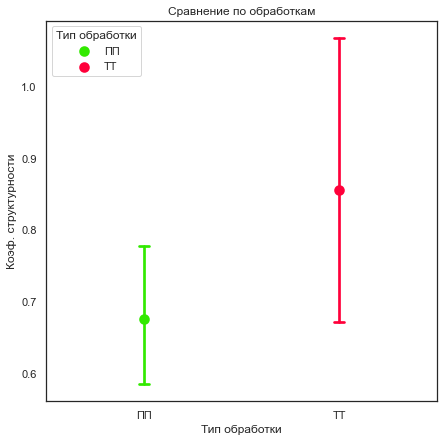

In [32]:
stats, aov, fig = agrofiz_plot(agrofiz, 'Коэф. структурности')
stats

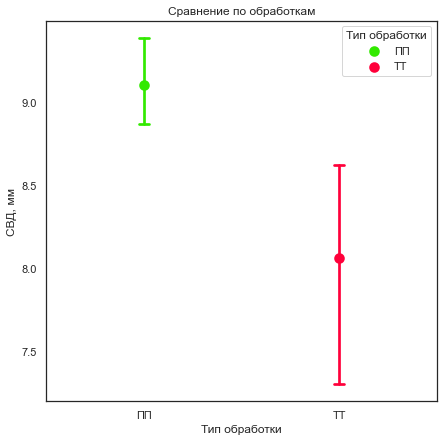

In [10]:
agrofiz_plot(agrofiz, 'СВД, мм')

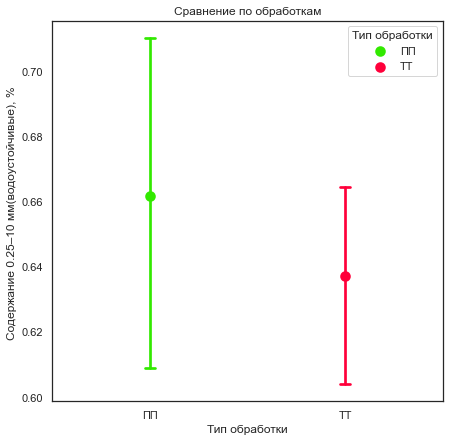

In [11]:
agrofiz_plot(agrofiz,  'Содержание 0.25–10 мм(водоустойчивые), % ')

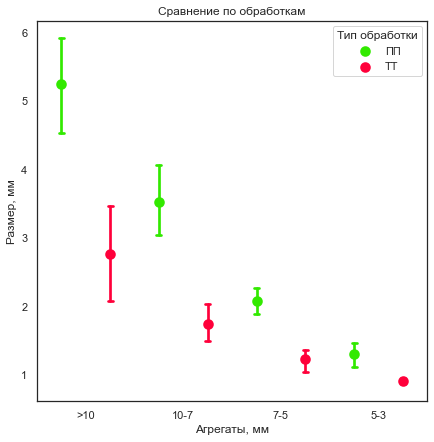

In [18]:
SVD_vis(agrofiz)

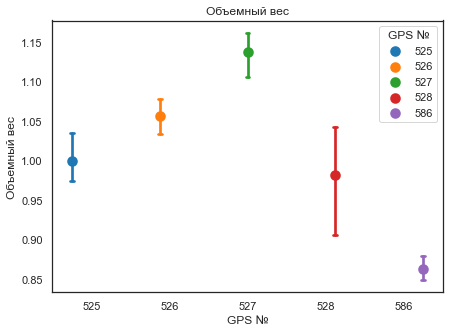

In [15]:
ob_ves = pd.read_csv('полевые данные общая/ready_data/объемный вес.csv')

def ob_ves_plot(ob_ves):
        fig= plt.figure(figsize=(7,5))
        ob_ves_plot = sns.pointplot(data = ob_ves,
                x = "GPS №",
                y = "Объемный вес",
                hue = "GPS №",
                palette = "tab10",
                scale = 1.2,
                ci = 95,
                dodge= 0.5,
                join = False,
                capsize = .05,
        )
        ob_ves_plot.set(title =  'Объемный вес')
        plt.show()

ob_ves_plot(ob_ves)

In [16]:
ob_ves

,повторность,Объемный вес,GPS №
0,4,1.079381,526
1,3,1.045722,526
2,1,1.076029,526
3,2,1.022189,526
4,4,0.991603,525
5,3,1.051029,525
6,1,0.986016,525
7,2,0.967581,525
8,3,1.091880,527
9,2,1.167298,527
